In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

In [4]:
visible = Input( shape=(10, ))
hidden1 = Dense(10, activation='relu') (visible)
hidden2 = Dense(20, activation='relu') (hidden1)
hidden3 = Dense(10, activation='relu') (hidden2)
output = Dense(1, activation='sigmoid') (hidden3)

model = Model(inputs=[visible], outputs=[output])

2023-10-23 22:49:08.726315: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-23 22:49:08.726354: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-23 22:49:08.726367: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-23 22:49:08.726478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-23 22:49:08.726737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


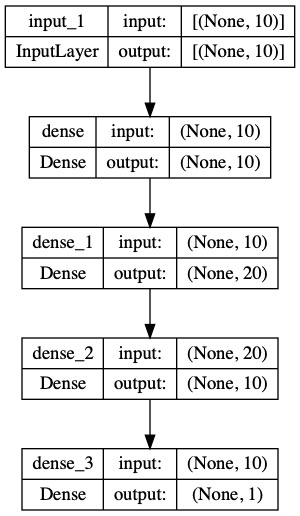

In [5]:
plot_model(model, to_file='model1.jpg', show_shapes=True)

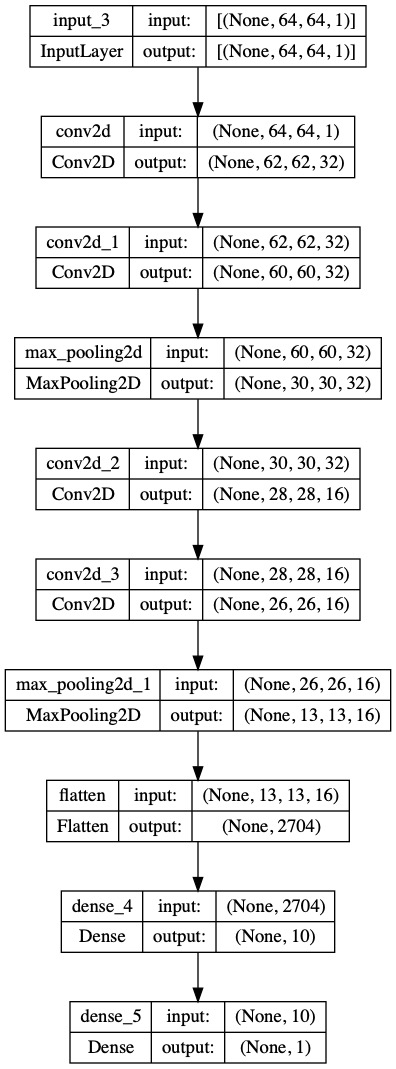

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D,Conv2D
from tensorflow.keras.utils import plot_model

visible = Input( shape=(64,64,1) )
hidden1 = Conv2D(32, kernel_size=(3,3), activation='relu') (visible)
hidden2 = Conv2D(32, kernel_size=(3,3), activation='relu') (hidden1)
hidden3 = MaxPooling2D((2,2)) (hidden2)
hidden4 = Conv2D(16, kernel_size=(3,3), activation='relu') (hidden3)
hidden5 = Conv2D(16, kernel_size=(3,3), activation='relu') (hidden4)
hidden6 = MaxPooling2D((2,2)) (hidden5)
hidden7 = Flatten()(hidden6)
hidden8 = Dense(10, activation='relu')(hidden7)
output = Dense(1, activation='softmax') (hidden8)

model = Model(inputs=[visible], outputs=[output])

plot_model(model, to_file='haha.jpg', show_shapes=True)

# 분기모델
---
### 하나의 입력을 두 개의 출력으로 분기하는 경우

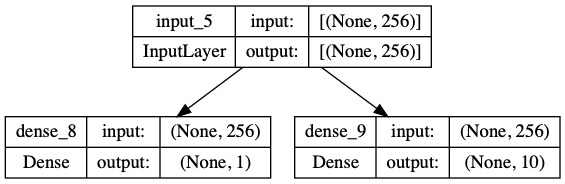

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

input1 = Input(shape=(256,))
output1 = Dense(1,activation='sigmoid') (input1)
output2 = Dense(10,activation='softmax') (input1)
model = Model(inputs=[input1], outputs=[output1,output2])

plot_model(model, to_file='jajaja.jpg', show_shapes=True)

# 병합 모델
---
### 두 개의 입력을 한 개의 출력으로 병합

# 다양한 병합 방식 존재
---
### 입력들을 그대로 붙인다 
### 입력들을 더한다
### 입력들을 뺀다
### 입력들을 곱한다
### 입력들을 내적한다

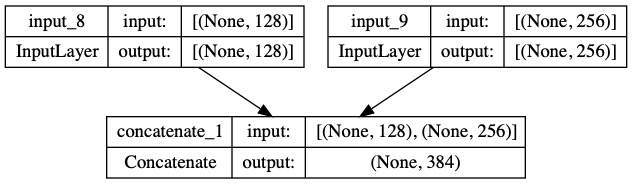

In [11]:
# 병합 모델 - 그대로 붙이기
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input1 = Input(shape=(128,))
input2 = Input(shape=(256,))
output = Concatenate()([input1,input2])
model = Model(inputs=[input1, input2], outputs=[output])

plot_model(model,to_file='qwqwe.jpg',show_shapes=True)

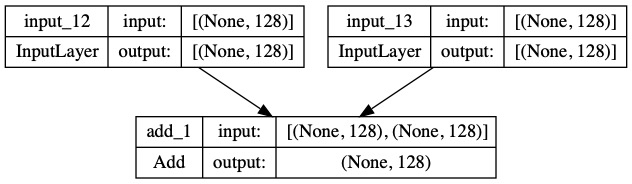

In [13]:
# 두개의 입력을 한 개의 출력으로 병합(더히기)
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input1 = Input(shape=(128,))
input2 = Input(shape=(128,))
output = Add()([input1,input2])

model = Model(inputs=[input1,input2], outputs=[output])
plot_model(model, to_file='ef.jpg',show_shapes=True)

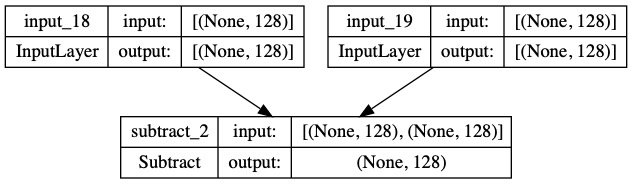

In [16]:
# 빼기
from tensorflow.keras.layers import Input, Subtract
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input1 = Input(shape=(128,))
input2 = Input(shape=(128,))
output = Subtract()([input1,input2])
model = Model(inputs=[input1,input2], outputs=[output])
plot_model(model,to_file='adsf.jpg',show_shapes=True)

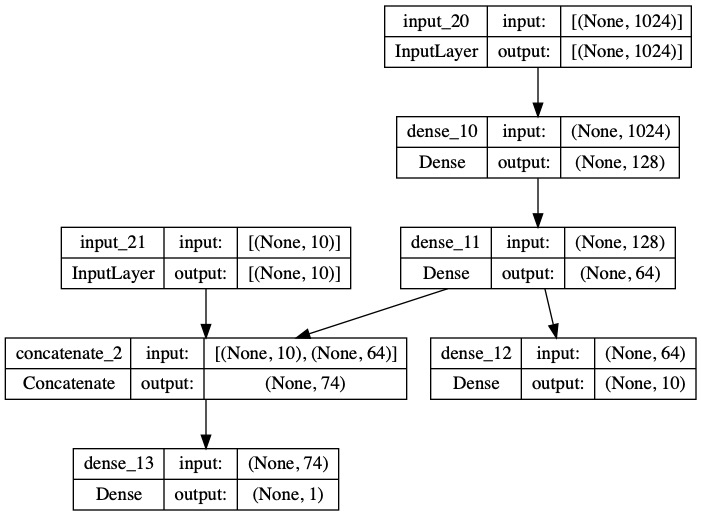

In [17]:
# 실습
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Concatenate
from tensorflow.keras.utils import plot_model

main_input = Input(shape=(1024,))
dense128 = Dense(128, activation='relu') (main_input)
dense64 = Dense(64, activation='relu') (dense128)
aux_input = Input(shape=(10,)) 
merge = Concatenate()([aux_input,dense64])
aux_output = Dense(10, activation='relu') (dense64)
main_output = Dense(1,) (merge)

model = Model(inputs=[main_input,aux_input],outputs=[aux_output,main_output])
plot_model(model,to_file='adf.jpg',show_shapes=True)

# Inception Model

## 입력값 빼먹는 것만 좀 고치자

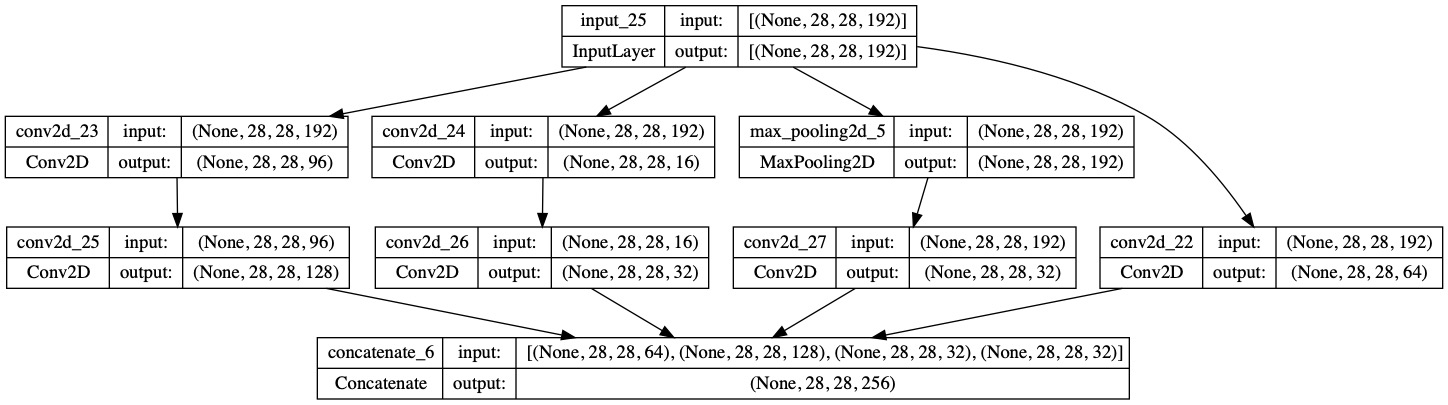

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,MaxPooling2D,Concatenate
from tensorflow.keras.utils import plot_model

pa = Input(shape=(28,28,192))
conv11_0 = Conv2D(64, kernel_size=(1,1), padding='same') (pa)
conv11_1 = Conv2D(96, kernel_size=(1,1), padding='same') (pa)
conv11_2 = Conv2D(16, kernel_size=(1,1), padding='same') (pa)
maxPool_1 = MaxPooling2D((3,3), padding='same', strides=1) (pa)
conv33 = Conv2D(128,kernel_size=(3,3),padding='same') (conv11_1)
conv55 = Conv2D(32,kernel_size=(5,5),padding='same') (conv11_2)
conv11_0_1 = Conv2D(32,kernel_size=(1,1),padding='same') (maxPool_1)
output = Concatenate() ([conv11_0,conv33,conv55,conv11_0_1])

model = Model(inputs=[pa], outputs=[output])
plot_model(model,to_file='adsf.jpg',show_shapes=True)

# Residual Module
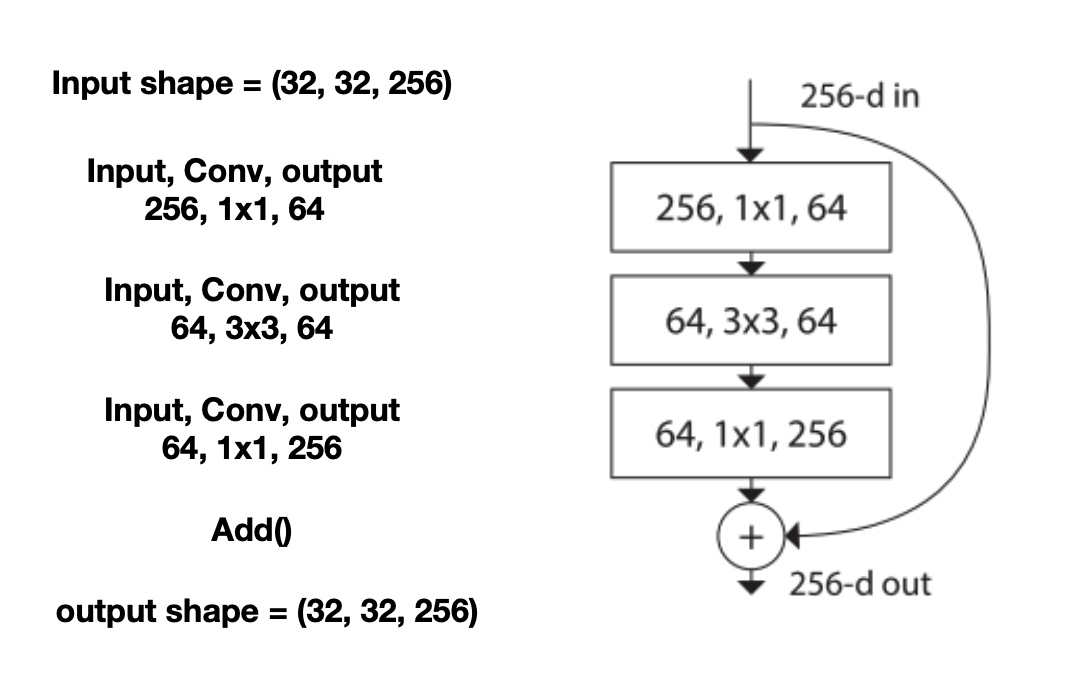

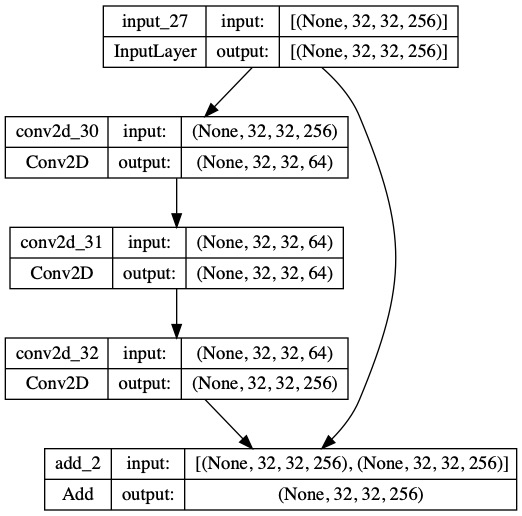

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Add
from tensorflow.keras.utils import plot_model

input1 = Input(shape=(32,32,256))
conv1 = Conv2D(64, kernel_size=(1,1), padding='same') (input1)
conv2 = Conv2D(64, kernel_size=(3,3), padding='same') (conv1)
conv3 = Conv2D(256, kernel_size=(1,1), padding='same') (conv2)
output = Add()([input1,conv3])
model = Model(inputs=[input1],outputs=[output])
plot_model(model,to_file='adsfasf.jpg',show_shapes=True)

# Siamese Network

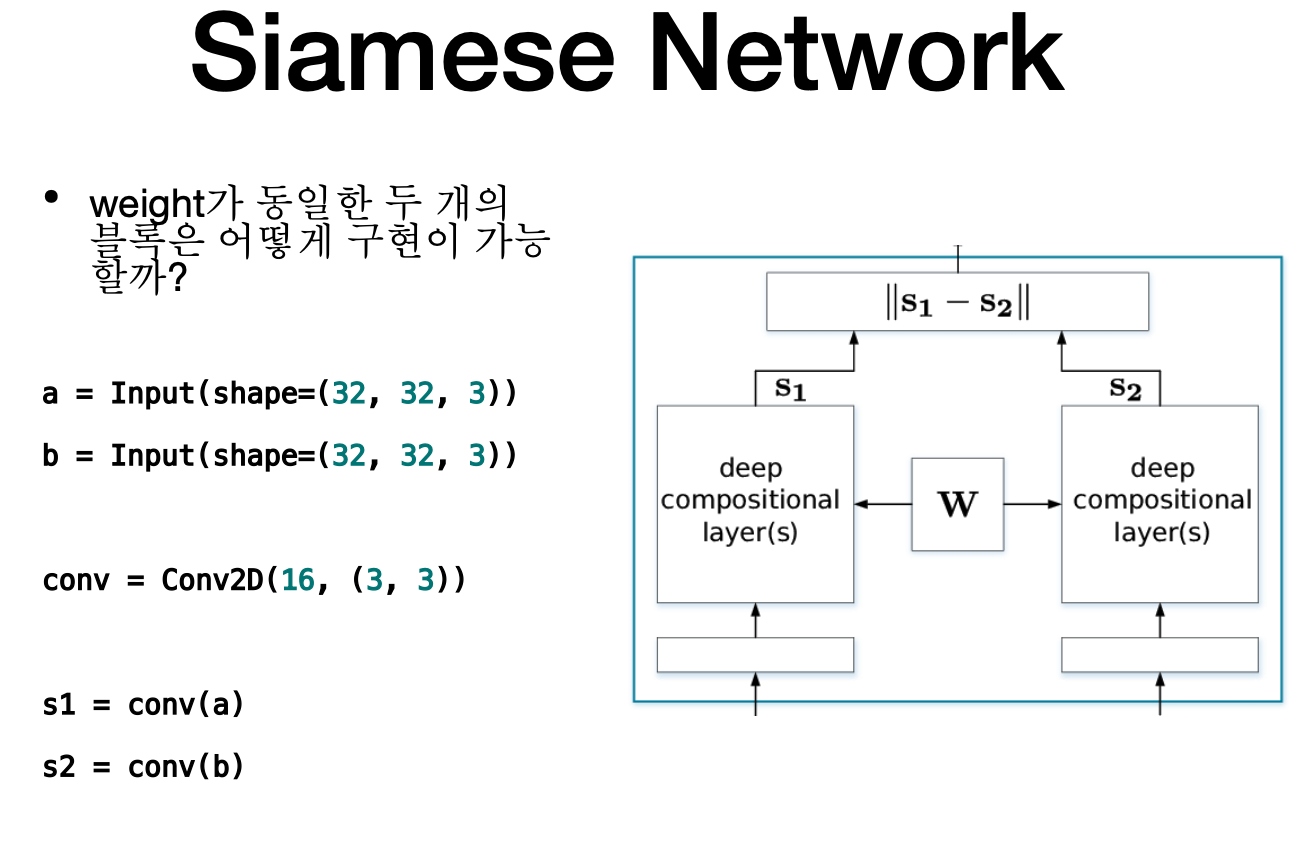

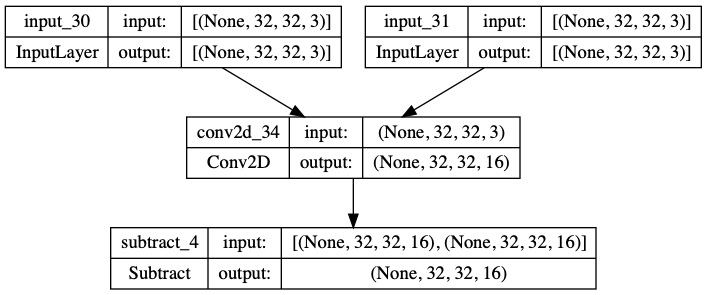

In [25]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Add,Input,MaxPooling2D,Flatten,Subtract

input1 = Input(shape=(32,32,3))
input2 = Input(shape=(32,32,3))
f_conv = Conv2D(16,kernel_size=(3,3),padding='same')
conv1 = f_conv(input1)
conv2 = f_conv(input2)
#conv1 = Conv2D(16, (3,3), padding='same') (input1)
#conv2 = Conv2D(16, (3,3), padding='same') (input2)
output = Subtract()([conv1,conv2])
model = keras.Model(inputs=[input1,input2],outputs=[output])

from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.jpg", show_shapes=True)